# **_Chess Piece Validation Model_**

### __*This CNN is supposed can determine what kind of Chess Piece is in the Image from the original Dataset*__

<br>

### __*Import Libraries and choose the device*__

In [28]:
# Import of the Libraries
import os
import CNN

# Torch libraries
from torch.utils.data import DataLoader

# Device config
GPU = CNN.pick_device()

Using the Graphics Card


<br>

### __*Training Preparation (Set all variables here)*__

In [29]:
# Hyper-parameters
num_epochs = 25         # How many times to repeat learning
batch_size = 8          # Number of images to send at once
learning_rate = 0.001    # How quickly should it learn
steps_per_epoch = 1     # Number of prints per epoch

# Image Dimensions
IMG_SIZE = 85           # 85*85 pixels
COLOUR_SIZE = 1

# Define the directory
FILE_PATH = './data/chess/pieces'           # Sub-Folders Location
CSV_PATH = './data/chess/data.csv'          # CSV Location
CATEGORIES = os.listdir(FILE_PATH)          # Turn Sub-Folder names into a list
N_CLASSES = len(CATEGORIES)                 # Number of different classes

# Normalized Transformation
MEAN, STD = CNN.dataset.get_normal(FILE_PATH, IMG_SIZE, IMG_SIZE)
trans_normal = CNN.dataset.trans_normal(IMG_SIZE, IMG_SIZE, MEAN, STD)

# Create the .csv file & dictionary
indexing = CNN.dataset.create_csv(FILE_PATH, CSV_PATH, rewrite=True, mul=1)

# Create the Datasets
dataset = CNN.dataset.CustomDataset(FILE_PATH, CSV_PATH, transform=trans_normal)

# Create the DataLoaders
loader = DataLoader(dataset=dataset, batch_size=batch_size)

# Create the Model
model = CNN.model.ConvNet(COLOUR_SIZE, N_CLASSES).to(GPU)

#### __*Look at some data*__

In [30]:
# Get some random training stats
CNN.visual.overview(dataset, None, indexing)

<br>

### __*Validation Loop*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: pawn


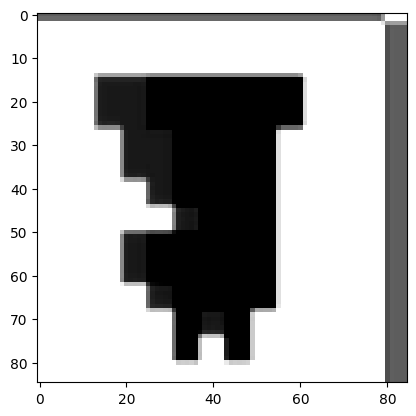

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: pawn


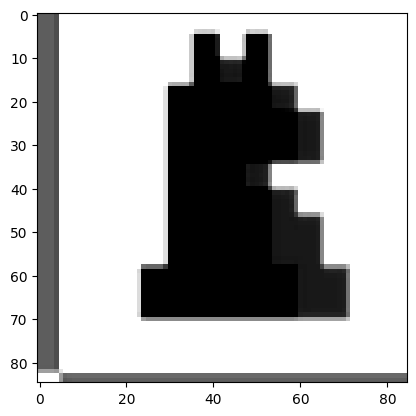

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: pawn


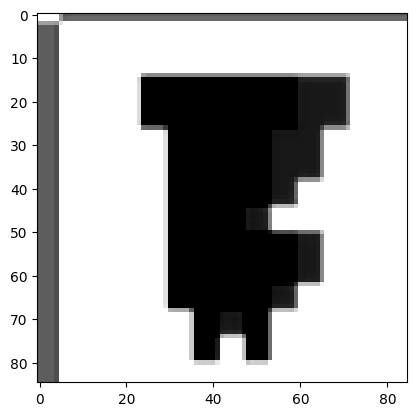

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: knight | Predicted: queen


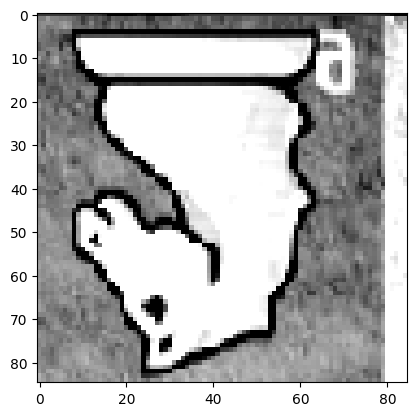

Accuracy of the Model: 99.81 %
Accuracy of king: 100.00 %
Accuracy of pawn: 100.00 %
Accuracy of rook: 100.00 %
Accuracy of queen: 100.00 %
Accuracy of bishop: 100.00 %
Accuracy of knight: 98.59 %


In [33]:
SAVE_PATH = './chess99knight.pth'

# Test the dataset
res = CNN.model.load_model(model, loader, CATEGORIES, save=SAVE_PATH, show_wrongs=True, n_wrongs=9999)